Sources:
https://bradfieldcs.com/algos/graphs/dijkstras-algorithm/

- Explain what the idea of this algorithm is
- Explain the general steps of this algorithm
- Say what the time complexity is 

### Dijkstra's algorithm steps:

1. 
2.
3.


Starting Dijkstra's algorithm!
This is the shortest path from A to E:
['A', 'B', 'D', 'E']
Shortest Distance from A to
A: 0 | Previous node: A
B: 3 | Previous node: A
C: 4 | Previous node: A
D: 8 | Previous node: B
E: 17 | Previous node: D
F: 16 | Previous node: D
G: 20 | Previous node: F



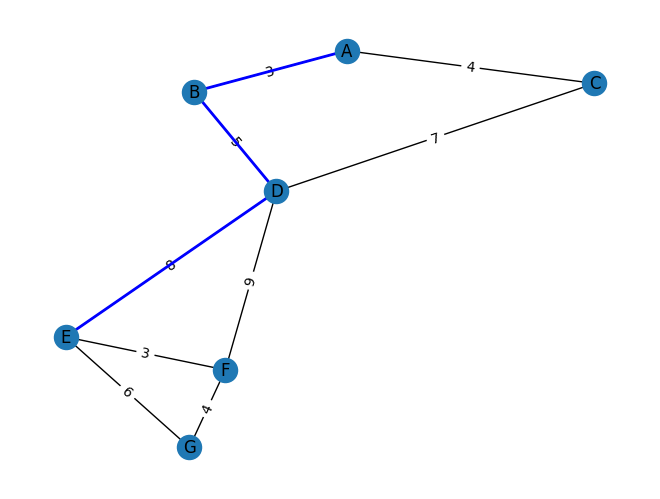

In [18]:
# code goes here!
from heapq import heappop, heappush
from math import inf
from visualization import visualize_graph


class graph_vertex:
  def __init__(self, name, x, y):
    self.name = name
    self.position = (x, y)

# Set up example graph
a = graph_vertex("A", 0, 2)
b = graph_vertex("B", 1, 4)
c = graph_vertex("C", 1, 1)
d = graph_vertex("D", 2, 2)
e = graph_vertex("E", 4, 1)
f = graph_vertex("F", 5, 3)
g = graph_vertex("G", 6, 1)

euclidean_graph = {
  a: set([(b, 3), (c, 4)]),
  b: set([(a, 3), (d, 5)]),
  c: set([(a, 4), (d, 7)]),
  d: set([(b, 5), (c, 7), (e, 9), (f, 8)]),
  e: set([(d, 8), (g, 6), (f, 3)]),
  f: set([(d, 9), (g, 4), (e, 3)]),
  g: set([(e, 6), (f, 4)])
}


def dijkstras(graph, start):
    """
    Apply Dijkstra's algorithm to find the shortest paths from a starting vertex to all other vertices.

    Parameters:
    - graph (dict): An adjacency list representation of the graph where keys are vertices, and values are lists of tuples
                    representing neighboring vertices and corresponding edge weights.
    - start: The starting vertex for Dijkstra's algorithm.

    Returns:
    - dict: A dictionary containing the shortest distances from the start vertex to all other vertices,
            and the predecessors in the shortest paths.
    """

    print("Starting Dijkstra's algorithm!")

    # Initialize distances dictionary with infinity for all vertices and None as predecessors
    distances = {vertex: [inf, None] for vertex in graph}

    # Set the distance to the start vertex as 0
    distances[start][0] = 0
    distances[start][1] = start

    # Initialize the priority queue with the start vertex and its distance
    vertices_to_explore = [(0, start)]

    # Main loop of Dijkstra's algorithm
    while vertices_to_explore:
        current_distance, current_vertex = heappop(vertices_to_explore)

        # Explore neighbors and update distances and predecessors
        for neighbor, edge_weight in graph[current_vertex]:
            new_distance = current_distance + edge_weight

            # Update if a shorter path is found
            if new_distance < distances[neighbor][0]:
                distances[neighbor][0] = new_distance
                distances[neighbor][1] = current_vertex

                # Add the neighbor to the priority queue for further exploration
                heappush(vertices_to_explore, (new_distance, neighbor))

    return distances

        
def dijkstras_path(distances, start, target):
    """
    Reconstruct the shortest path from a starting vertex to a target vertex using Dijkstra's algorithm.

    Parameters:
    - distances (dict): A dictionary containing the shortest distances and predecessors obtained from Dijkstra's algorithm.
    - start: The starting vertex of the path.
    - target: The target vertex of the path.

    Returns:
    - list: A list representing the shortest path from the start vertex to the target vertex.
    """
    print(f"This is the shortest path from {start.name} to {target.name}:")

    # Initialize the path with the target vertex
    path = [target.name]

    # Trace back the path from the target to the start using predecessors in distances
    curr = target
    while True:
        curr = distances[curr][1]  # Move to the predecessor
        path = [curr.name] + path  # Add the current vertex to the path
        if curr.name == start.name:  # Break the loop when the start vertex is reached
            break
    return path


distances_from_a = dijkstras(euclidean_graph, a)
path_from_a_to_g = dijkstras_path(distances_from_a, a, e)
print(path_from_a_to_g)
# print("Shortest Distance from A to")
# for key, value in distances_from_a.items():
#   print(f"{key.name}: {value[0]} | Previous node: {value[1].name}")

def create_edge_dict(graph):
  """
    Converts a graph into a dictionary for edge visualization.

    Parameters:
        graph (dict): A dictionary representing the graph.

    Returns:
        dict: A dictionary where keys are tuples (start_vertex_name, end_vertex_name) and values are edge weights.
  """
  edge_dict = {}
  for key, connections in graph.items():
    for conn in connections:
        edge_dict[(key.name, conn[0].name)] = conn[1]
            
  return edge_dict

# Visualization of the graph
graph_edge_dict = create_edge_dict(euclidean_graph)
print()
visualize_graph(graph_edge_dict, path_from_a_to_g)


## Time Complexity Breakdown

